# The purpose of this code is review types of dimension reductions in machine learning.

In [1]:
import os
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import decimal


In [2]:
df = pd.read_csv("human-activity-recognition-with-smartphones.csv")

In [3]:
print(f"Dataframe shape : {df.shape}")

Dataframe shape : (7352, 563)


In [4]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
list_of_activity = df["Activity"].unique().tolist() 
print(list_of_activity)

['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [6]:
X = df.drop(columns = "Activity")
print(X.shape)

(7352, 562)


In [7]:
y = df["Activity"]
print(y.shape)

(7352,)


In [8]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

In [9]:
X_train.shape

(5881, 562)

In [10]:
X_test.shape

(1471, 562)

In [11]:
y_train.shape

(5881,)

In [12]:
y_test.shape

(1471,)

In [13]:
GNB_classifer = GaussianNB()

In [14]:
fitted_GNB = GNB_classifer.fit(X_train, y_train)

In [15]:
y_predicted = fitted_GNB.predict(X_test)

In [16]:
y_predicted

array(['SITTING', 'SITTING', 'WALKING_DOWNSTAIRS', ...,
       'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING'], dtype='<U18')

In [17]:
first_prediction = accuracy_score(y_test, y_predicted)
print(first_prediction)

0.7681849082256968


# Feature selection

**Select K best**

f_classif

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [19]:
feature_selection_SelectKBest_100 = SelectKBest(f_classif, k=100)

In [20]:
X_feature_selection_f_classif_100 = feature_selection_SelectKBest_100.fit_transform(X, y)
X_feature_selection_f_classif_100.shape

(7352, 100)

In [21]:
X_train_f_classif_100, X_test_f_classif_100,y_train_f_classif_100, y_test_f_classif_100 = train_test_split(X_feature_selection_f_classif_100,y, test_size=0.2)

In [22]:
print(f"X_train_f_classif_100: {X_train_f_classif_100.shape}")
print(f"X_test_f_classif_100: {X_test_f_classif_100.shape}")
print(f"y_train_f_classif_100: {y_train_f_classif_100.shape}")
print(f"y_test_f_classif_100: {y_test_f_classif_100.shape}")

X_train_f_classif_100: (5881, 100)
X_test_f_classif_100: (1471, 100)
y_train_f_classif_100: (5881,)
y_test_f_classif_100: (1471,)


In [23]:
fitted_GNB_f_classif_100 = GNB_classifer.fit(X_train_f_classif_100, y_train_f_classif_100)

In [24]:
y_predicted_f_classif_100 = fitted_GNB_f_classif_100.predict(X_test_f_classif_100)

In [25]:
    y_predicted_f_classif_100

array(['WALKING_UPSTAIRS', 'STANDING', 'WALKING_UPSTAIRS', ..., 'WALKING',
       'LAYING', 'LAYING'], dtype='<U18')

In [26]:
accuracy_prediction_f_classif_100 = accuracy_score(y_test_f_classif_100, y_predicted_f_classif_100)
print(f"accuracy_f_classif_100: {accuracy_prediction_f_classif_100}")

accuracy_f_classif_100: 0.7946974847042828


In [27]:
    feature_selection_SelectKBest_200 = SelectKBest(f_classif, k=200)
    X_feature_selection_f_classif_200 = feature_selection_SelectKBest_200.fit_transform(X, y)
    X_feature_selection_f_classif_200.shape
    X_train_f_classif_200, X_test_f_classif_200,y_train_f_classif_200, y_test_f_classif_200 = train_test_split(X_feature_selection_f_classif_200,y, test_size=0.2)
    print(f"X_train_f_classif_200: {X_train_f_classif_200.shape}")
    print(f"X_test_f_classif_200: {X_test_f_classif_200.shape}")
    print(f"y_train_f_classif_200: {y_train_f_classif_200.shape}")
    print(f"y_test_f_classif_200: {y_test_f_classif_200.shape}")
    fitted_GNB_f_classif_200 = GNB_classifer.fit(X_train_f_classif_200, y_train_f_classif_200)
    y_predicted_f_classif_200 = fitted_GNB_f_classif_200.predict(X_test_f_classif_200)
    accuracy_prediction_f_classif_200 = accuracy_score(y_test_f_classif_200, y_predicted_f_classif_200)
    print(f"accuracy_f_classif_200: {accuracy_prediction_f_classif_200}")

X_train_f_classif_200: (5881, 200)
X_test_f_classif_200: (1471, 200)
y_train_f_classif_200: (5881,)
y_test_f_classif_200: (1471,)
accuracy_f_classif_200: 0.8280081577158396


In [28]:
feature_selection_SelectKBest_300 = SelectKBest(f_classif, k=300)
X_feature_selection_f_classif_300 = feature_selection_SelectKBest_300.fit_transform(X, y)
X_feature_selection_f_classif_300.shape
X_train_f_classif_300, X_test_f_classif_300,y_train_f_classif_300, y_test_f_classif_300 = train_test_split(X_feature_selection_f_classif_300,y, test_size=0.2)
print(f"X_train_f_classif_300: {X_train_f_classif_300.shape}")
print(f"X_test_f_classif_300: {X_test_f_classif_300.shape}")
print(f"y_train_f_classif_300: {y_train_f_classif_300.shape}")
print(f"y_test_f_classif_300: {y_test_f_classif_300.shape}")
fitted_GNB_f_classif_300 = GNB_classifer.fit(X_train_f_classif_300, y_train_f_classif_300)
y_predicted_f_classif_300 = fitted_GNB_f_classif_300.predict(X_test_f_classif_300)
accuracy_prediction_f_classif_300 = accuracy_score(y_test_f_classif_300, y_predicted_f_classif_300)
print(f"accuracy_f_classif_300: {accuracy_prediction_f_classif_300}")

X_train_f_classif_300: (5881, 300)
X_test_f_classif_300: (1471, 300)
y_train_f_classif_300: (5881,)
y_test_f_classif_300: (1471,)
accuracy_f_classif_300: 0.8130523453433038


In [29]:
feature_selection_SelectKBest_400 = SelectKBest(f_classif, k=400)
X_feature_selection_f_classif_400 = feature_selection_SelectKBest_400.fit_transform(X, y)
X_feature_selection_f_classif_400.shape
X_train_f_classif_400, X_test_f_classif_400,y_train_f_classif_400, y_test_f_classif_400 = train_test_split(X_feature_selection_f_classif_400,y, test_size=0.2)
print(f"X_train_f_classif_400: {X_train_f_classif_400.shape}")
print(f"X_test_f_classif_400: {X_test_f_classif_400.shape}")
print(f"y_train_f_classif_400: {y_train_f_classif_400.shape}")
print(f"y_test_f_classif_400: {y_test_f_classif_400.shape}")
fitted_GNB_f_classif_400 = GNB_classifer.fit(X_train_f_classif_400, y_train_f_classif_400)
y_predicted_f_classif_400 = fitted_GNB_f_classif_400.predict(X_test_f_classif_400)
accuracy_prediction_f_classif_400 = accuracy_score(y_test_f_classif_400, y_predicted_f_classif_400)
print(f"accuracy_f_classif_400: {accuracy_prediction_f_classif_400}")

X_train_f_classif_400: (5881, 400)
X_test_f_classif_400: (1471, 400)
y_train_f_classif_400: (5881,)
y_test_f_classif_400: (1471,)
accuracy_f_classif_400: 0.7049626104690686


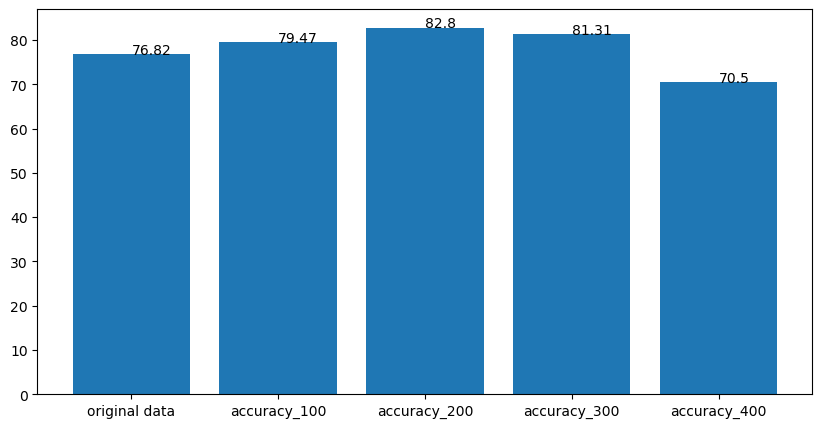

In [30]:
import matplotlib.pyplot as plt

execution = ("original data", 'accuracy_100','accuracy_200',
             'accuracy_300','accuracy_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_f_classif_100*100,2)), float(round(accuracy_prediction_f_classif_200*100,2)), 
            float(round(accuracy_prediction_f_classif_300*100,2)), float(round(accuracy_prediction_f_classif_400*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

chi2

In [31]:
from sklearn.feature_selection import chi2

In [32]:
feature_selection_chi2_100 = SelectKBest(chi2, k=100)

In [33]:
X_feature_selection_chi2_100 = feature_selection_chi2_100.fit_transform(X, y)
X_feature_selection_chi2_100.shape

ValueError: Input X must be non-negative.

In [ ]:
min_of_columns = X.min()
min_of_dataframe = min_of_columns.min()
min_of_dataframe

In [ ]:
max_of_columns = X.max()
max_of_dataframe = max_of_columns.max()
max_of_dataframe

> solution: MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(X)
scaled = scaler.fit_transform(X)
X_max_min = pd.DataFrame(scaled, columns=X.columns)
X_max_min

In [ ]:
feature_selection_SelectKBest_100 = SelectKBest(chi2, k=100)
X_feature_selection_chi2_100 = feature_selection_SelectKBest_100.fit_transform(X_max_min, y)
X_feature_selection_chi2_100.shape
X_train_chi2_100, X_test_chi2_100,y_train_chi2_100, y_test_chi2_100 = train_test_split(X_feature_selection_chi2_100,y, test_size=0.2)
print(f"X_train_chi2_100: {X_train_chi2_100.shape}")
print(f"X_test_chi2_100: {X_test_chi2_100.shape}")
print(f"y_train_chi2_100: {y_train_chi2_100.shape}")
print(f"y_test_chi2_100: {y_test_chi2_100.shape}")
fitted_GNB_chi2_100 = GNB_classifer.fit(X_train_chi2_100, y_train_chi2_100)
y_predicted_chi2_100 = fitted_GNB_chi2_100.predict(X_test_chi2_100)
accuracy_prediction_chi2_100 = accuracy_score(y_test_chi2_100, y_predicted_chi2_100)
print(f"accuracy_chi2_100: {accuracy_prediction_chi2_100}")

In [ ]:
feature_selection_SelectKBest_200 = SelectKBest(chi2, k=200)
X_feature_selection_chi2_200 = feature_selection_SelectKBest_200.fit_transform(X_max_min, y)
X_feature_selection_chi2_200.shape
X_train_chi2_200, X_test_chi2_200,y_train_chi2_200, y_test_chi2_200 = train_test_split(X_feature_selection_chi2_200,y, test_size=0.2)
print(f"X_train_chi2_200: {X_train_chi2_200.shape}")
print(f"X_test_chi2_200: {X_test_chi2_200.shape}")
print(f"y_train_chi2_200: {y_train_chi2_200.shape}")
print(f"y_test_chi2_200: {y_test_chi2_200.shape}")
fitted_GNB_chi2_200 = GNB_classifer.fit(X_train_chi2_200, y_train_chi2_200)
y_predicted_chi2_200 = fitted_GNB_chi2_200.predict(X_test_chi2_200)
accuracy_prediction_chi2_200 = accuracy_score(y_test_chi2_200, y_predicted_chi2_200)
print(f"accuracy_chi2_200: {accuracy_prediction_chi2_200}")

In [ ]:
feature_selection_SelectKBest_300 = SelectKBest(chi2, k=300)
X_feature_selection_chi2_300 = feature_selection_SelectKBest_300.fit_transform(X_max_min, y)
X_feature_selection_chi2_300.shape
X_train_chi2_300, X_test_chi2_300,y_train_chi2_300, y_test_chi2_300 = train_test_split(X_feature_selection_chi2_300,y, test_size=0.2)
print(f"X_train_chi2_300: {X_train_chi2_300.shape}")
print(f"X_test_chi2_300: {X_test_chi2_300.shape}")
print(f"y_train_chi2_300: {y_train_chi2_300.shape}")
print(f"y_test_chi2_300: {y_test_chi2_300.shape}")
fitted_GNB_chi2_300 = GNB_classifer.fit(X_train_chi2_300, y_train_chi2_300)
y_predicted_chi2_300 = fitted_GNB_chi2_300.predict(X_test_chi2_300)
accuracy_prediction_chi2_300 = accuracy_score(y_test_chi2_300, y_predicted_chi2_300)
print(f"accuracy_chi2_300: {accuracy_prediction_chi2_300}")

In [ ]:
feature_selection_SelectKBest_400 = SelectKBest(chi2, k=400)
X_feature_selection_chi2_400 = feature_selection_SelectKBest_400.fit_transform(X_max_min, y)
X_feature_selection_chi2_400.shape
X_train_chi2_400, X_test_chi2_400,y_train_chi2_400, y_test_chi2_400 = train_test_split(X_feature_selection_chi2_400,y, test_size=0.2)
print(f"X_train_chi2_400: {X_train_chi2_400.shape}")
print(f"X_test_chi2_400: {X_test_chi2_400.shape}")
print(f"y_train_chi2_400: {y_train_chi2_400.shape}")
print(f"y_test_chi2_400: {y_test_chi2_400.shape}")
fitted_GNB_chi2_400 = GNB_classifer.fit(X_train_chi2_400, y_train_chi2_400)
y_predicted_chi2_400 = fitted_GNB_chi2_400.predict(X_test_chi2_400)
accuracy_prediction_chi2_400 = accuracy_score(y_test_chi2_400, y_predicted_chi2_400)
print(f"accuracy_chi2_400: {accuracy_prediction_chi2_400}")

In [ ]:
import matplotlib.pyplot as plt

execution = ("original data", 'accuracy_100','accuracy_200',
             'accuracy_300','accuracy_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_chi2_100*100,2)), float(round(accuracy_prediction_chi2_200*100,2)), 
            float(round(accuracy_prediction_chi2_300*100,2)), float(round(accuracy_prediction_chi2_400*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

mutual_info_classif

In [ ]:
from sklearn.feature_selection import mutual_info_classif

feature_selection_SelectKBest_100 = SelectKBest(mutual_info_classif, k=100)
X_feature_selection_mutual_info_classif_100 = feature_selection_SelectKBest_100.fit_transform(X_max_min, y)
X_feature_selection_mutual_info_classif_100.shape
X_train_mutual_info_classif_100, X_test_mutual_info_classif_100,y_train_mutual_info_classif_100, y_test_mutual_info_classif_100 = train_test_split(X_feature_selection_mutual_info_classif_100,y, test_size=0.2)
print(f"X_train_mutual_info_classif_100: {X_train_mutual_info_classif_100.shape}")
print(f"X_test_mutual_info_classif_100: {X_test_mutual_info_classif_100.shape}")
print(f"y_train_mutual_info_classif_100: {y_train_mutual_info_classif_100.shape}")
print(f"y_test_mutual_info_classif_100: {y_test_mutual_info_classif_100.shape}")
fitted_GNB_mutual_info_classif_100 = GNB_classifer.fit(X_train_mutual_info_classif_100, y_train_mutual_info_classif_100)
y_predicted_mutual_info_classif_100 = fitted_GNB_mutual_info_classif_100.predict(X_test_mutual_info_classif_100)
accuracy_prediction_mutual_info_classif_100 = accuracy_score(y_test_mutual_info_classif_100, y_predicted_mutual_info_classif_100)
print(f"accuracy_mutual_info_classif_100: {accuracy_prediction_mutual_info_classif_100}")

In [ ]:
feature_selection_SelectKBest_200 = SelectKBest(mutual_info_classif, k=200)
X_feature_selection_mutual_info_classif_200 = feature_selection_SelectKBest_200.fit_transform(X_max_min, y)
X_feature_selection_mutual_info_classif_200.shape
X_train_mutual_info_classif_200, X_test_mutual_info_classif_200,y_train_mutual_info_classif_200, y_test_mutual_info_classif_200 = train_test_split(X_feature_selection_mutual_info_classif_200,y, test_size=0.2)
print(f"X_train_mutual_info_classif_200: {X_train_mutual_info_classif_200.shape}")
print(f"X_test_mutual_info_classif_200: {X_test_mutual_info_classif_200.shape}")
print(f"y_train_mutual_info_classif_200: {y_train_mutual_info_classif_200.shape}")
print(f"y_test_mutual_info_classif_200: {y_test_mutual_info_classif_200.shape}")
fitted_GNB_mutual_info_classif_200 = GNB_classifer.fit(X_train_mutual_info_classif_200, y_train_mutual_info_classif_200)
y_predicted_mutual_info_classif_200 = fitted_GNB_mutual_info_classif_200.predict(X_test_mutual_info_classif_200)
accuracy_prediction_mutual_info_classif_200 = accuracy_score(y_test_mutual_info_classif_200, y_predicted_mutual_info_classif_200)
print(f"accuracy_mutual_info_classif_200: {accuracy_prediction_mutual_info_classif_200}")

In [ ]:
feature_selection_SelectKBest_300 = SelectKBest(mutual_info_classif, k=300)
X_feature_selection_mutual_info_classif_300 = feature_selection_SelectKBest_300.fit_transform(X_max_min, y)
X_feature_selection_mutual_info_classif_300.shape
X_train_mutual_info_classif_300, X_test_mutual_info_classif_300,y_train_mutual_info_classif_300, y_test_mutual_info_classif_300 = train_test_split(X_feature_selection_mutual_info_classif_300,y, test_size=0.2)
print(f"X_train_mutual_info_classif_300: {X_train_mutual_info_classif_300.shape}")
print(f"X_test_mutual_info_classif_300: {X_test_mutual_info_classif_300.shape}")
print(f"y_train_mutual_info_classif_300: {y_train_mutual_info_classif_300.shape}")
print(f"y_test_mutual_info_classif_300: {y_test_mutual_info_classif_300.shape}")
fitted_GNB_mutual_info_classif_300 = GNB_classifer.fit(X_train_mutual_info_classif_300, y_train_mutual_info_classif_300)
y_predicted_mutual_info_classif_300 = fitted_GNB_mutual_info_classif_300.predict(X_test_mutual_info_classif_300)
accuracy_prediction_mutual_info_classif_300 = accuracy_score(y_test_mutual_info_classif_300, y_predicted_mutual_info_classif_300)
print(f"accuracy_mutual_info_classif_300: {accuracy_prediction_mutual_info_classif_300}")

In [ ]:
feature_selection_SelectKBest_400 = SelectKBest(mutual_info_classif, k=400)
X_feature_selection_mutual_info_classif_400 = feature_selection_SelectKBest_400.fit_transform(X_max_min, y)
X_feature_selection_mutual_info_classif_400.shape
X_train_mutual_info_classif_400, X_test_mutual_info_classif_400,y_train_mutual_info_classif_400, y_test_mutual_info_classif_400 = train_test_split(X_feature_selection_mutual_info_classif_400,y, test_size=0.2)
print(f"X_train_mutual_info_classif_400: {X_train_mutual_info_classif_400.shape}")
print(f"X_test_mutual_info_classif_400: {X_test_mutual_info_classif_400.shape}")
print(f"y_train_mutual_info_classif_400: {y_train_mutual_info_classif_400.shape}")
print(f"y_test_mutual_info_classif_400: {y_test_mutual_info_classif_400.shape}")
fitted_GNB_mutual_info_classif_400 = GNB_classifer.fit(X_train_mutual_info_classif_400, y_train_mutual_info_classif_400)
y_predicted_mutual_info_classif_400 = fitted_GNB_mutual_info_classif_400.predict(X_test_mutual_info_classif_400)
accuracy_prediction_mutual_info_classif_400 = accuracy_score(y_test_mutual_info_classif_400, y_predicted_mutual_info_classif_400)
print(f"accuracy_mutual_info_classif_400: {accuracy_prediction_mutual_info_classif_400}")

In [ ]:
execution = ("original data", 'accuracy_100','accuracy_200',
             'accuracy_300','accuracy_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_mutual_info_classif_100*100,2)), float(round(accuracy_prediction_mutual_info_classif_200*100,2)), 
            float(round(accuracy_prediction_mutual_info_classif_300*100,2)), float(round(accuracy_prediction_mutual_info_classif_400*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

Summary of Kbest

In [ ]:
execution = ("original data", 'f_classif_100','f_classif_200',
             'f_classif_300','f_classif_400','chi2_100','chi2_200',
             'chi2_300','chi2_400','mutual_100','mutual_200',
             'mutual_300','mutual_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_f_classif_100*100,2)), float(round(accuracy_prediction_f_classif_200*100,2)), 
            float(round(accuracy_prediction_f_classif_300*100,2)), float(round(accuracy_prediction_f_classif_400*100,2)), float(round(accuracy_prediction_chi2_100*100,2)), float(round(accuracy_prediction_chi2_200*100,2)), 
            float(round(accuracy_prediction_chi2_300*100,2)), float(round(accuracy_prediction_chi2_400*100,2)), float(round(accuracy_prediction_mutual_info_classif_100*100,2)), float(round(accuracy_prediction_mutual_info_classif_200*100,2)), 
            float(round(accuracy_prediction_mutual_info_classif_300*100,2)), float(round(accuracy_prediction_mutual_info_classif_400*100,2))]
fig = plt.figure(figsize = (20, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
feature_selection_SelectPercentile_25 = SelectPercentile(f_classif, percentile=25)
X_feature_selection_f_classif_25 = feature_selection_SelectPercentile_25.fit_transform(X, y)
X_feature_selection_f_classif_25.shape
X_train_f_classif_25, X_test_f_classif_25,y_train_f_classif_25, y_test_f_classif_25 = train_test_split(X_feature_selection_f_classif_25,y, test_size=0.2)
print(f"X_train_f_classif_25: {X_train_f_classif_25.shape}")
print(f"X_test_f_classif_25: {X_test_f_classif_25.shape}")
print(f"y_train_f_classif_25: {y_train_f_classif_25.shape}")
print(f"y_test_f_classif_25: {y_test_f_classif_25.shape}")
fitted_GNB_f_classif_25 = GNB_classifer.fit(X_train_f_classif_25, y_train_f_classif_25)
y_predicted_f_classif_25 = fitted_GNB_f_classif_25.predict(X_test_f_classif_25)
accuracy_prediction_f_classif_25 = accuracy_score(y_test_f_classif_25, y_predicted_f_classif_25)
print(f"accuracy_f_classif_25: {accuracy_prediction_f_classif_25}")

In [ ]:
feature_selection_SelectPercentile_50 = SelectPercentile(f_classif, percentile=50)
X_feature_selection_f_classif_50 = feature_selection_SelectPercentile_50.fit_transform(X, y)
X_feature_selection_f_classif_50.shape
X_train_f_classif_50, X_test_f_classif_50,y_train_f_classif_50, y_test_f_classif_50 = train_test_split(X_feature_selection_f_classif_50,y, test_size=0.2)
print(f"X_train_f_classif_50: {X_train_f_classif_50.shape}")
print(f"X_test_f_classif_50: {X_test_f_classif_50.shape}")
print(f"y_train_f_classif_50: {y_train_f_classif_50.shape}")
print(f"y_test_f_classif_50: {y_test_f_classif_50.shape}")
fitted_GNB_f_classif_50 = GNB_classifer.fit(X_train_f_classif_50, y_train_f_classif_50)
y_predicted_f_classif_50 = fitted_GNB_f_classif_50.predict(X_test_f_classif_50)
accuracy_prediction_f_classif_50 = accuracy_score(y_test_f_classif_50, y_predicted_f_classif_50)
print(f"accuracy_f_classif_50: {accuracy_prediction_f_classif_50}")

In [ ]:
feature_selection_SelectPercentile_75 = SelectPercentile(f_classif, percentile=75)
X_feature_selection_f_classif_75 = feature_selection_SelectPercentile_75.fit_transform(X, y)
X_feature_selection_f_classif_75.shape
X_train_f_classif_75, X_test_f_classif_75,y_train_f_classif_75, y_test_f_classif_75 = train_test_split(X_feature_selection_f_classif_75,y, test_size=0.2)
print(f"X_train_f_classif_75: {X_train_f_classif_75.shape}")
print(f"X_test_f_classif_75: {X_test_f_classif_75.shape}")
print(f"y_train_f_classif_75: {y_train_f_classif_75.shape}")
print(f"y_test_f_classif_75: {y_test_f_classif_75.shape}")
fitted_GNB_f_classif_75 = GNB_classifer.fit(X_train_f_classif_75, y_train_f_classif_75)
y_predicted_f_classif_75 = fitted_GNB_f_classif_75.predict(X_test_f_classif_75)
accuracy_prediction_f_classif_75 = accuracy_score(y_test_f_classif_75, y_predicted_f_classif_75)
print(f"accuracy_f_classif_75: {accuracy_prediction_f_classif_75}")

In [ ]:
execution = ("original data", 'accuracy_25P','accuracy_50P',
             'accuracy_75P')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_f_classif_25*100,2)), float(round(accuracy_prediction_f_classif_50*100,2)), 
            float(round(accuracy_prediction_f_classif_75*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

# PCA

In [ ]:
from sklearn import decomposition


In [ ]:
pca_100 = decomposition.PCA(n_components=100)
pca_100.fit(X)
X_pca_100 = pca_100.transform(X)

In [ ]:
X_pca_100.shape

In [ ]:
X_train_pca_100, X_test_pca_100,y_train_pca_100, y_test_pca_100 = train_test_split(X_pca_100,y, test_size=0.2)

In [ ]:
print(f"X_train_pca_100: {X_train_pca_100.shape}")
print(f"X_test_pca_100: {X_test_pca_100.shape}")
print(f"y_train_pca_100: {y_train_pca_100.shape}")
print(f"y_test_pca_100: {y_test_pca_100.shape}")

In [ ]:
fitted_GNB_pca_100 = GNB_classifer.fit(X_train_pca_100, y_train_pca_100)

In [ ]:
y_predicted_pca_100 = fitted_GNB_pca_100.predict(X_test_pca_100)

In [ ]:
accuracy_prediction_pca_100 = accuracy_score(y_test_pca_100, y_predicted_pca_100)
print(f"accuracy_pca_100: {accuracy_prediction_pca_100}")

In [ ]:
pca_200 = decomposition.PCA(n_components=200)
pca_200.fit(X)
X_pca_200 = pca_200.transform(X)
X_train_pca_200, X_test_pca_200,y_train_pca_200, y_test_pca_200 = train_test_split(X_pca_200,y, test_size=0.2)
print(f"X_train_pca_200: {X_train_pca_200.shape}")
print(f"X_test_pca_200: {X_test_pca_200.shape}")
print(f"y_train_pca_200: {y_train_pca_200.shape}")
print(f"y_test_pca_200: {y_test_pca_200.shape}")
fitted_GNB_pca_200 = GNB_classifer.fit(X_train_pca_200, y_train_pca_200)
y_predicted_pca_200 = fitted_GNB_pca_200.predict(X_test_pca_200)	
accuracy_prediction_pca_200 = accuracy_score(y_test_pca_200, y_predicted_pca_200)
print(f"accuracy_pca_200: {accuracy_prediction_pca_200}")

In [ ]:
pca_300 = decomposition.PCA(n_components=300)
pca_300.fit(X)
X_pca_300 = pca_300.transform(X)
X_train_pca_300, X_test_pca_300,y_train_pca_300, y_test_pca_300 = train_test_split(X_pca_300,y, test_size=0.2)
print(f"X_train_pca_300: {X_train_pca_300.shape}")
print(f"X_test_pca_300: {X_test_pca_300.shape}")
print(f"y_train_pca_300: {y_train_pca_300.shape}")
print(f"y_test_pca_300: {y_test_pca_300.shape}")
fitted_GNB_pca_300 = GNB_classifer.fit(X_train_pca_300, y_train_pca_300)
y_predicted_pca_300 = fitted_GNB_pca_300.predict(X_test_pca_300)	
accuracy_prediction_pca_300 = accuracy_score(y_test_pca_300, y_predicted_pca_300)
print(f"accuracy_pca_300: {accuracy_prediction_pca_300}")

In [ ]:
pca_400 = decomposition.PCA(n_components=400)
pca_400.fit(X)
X_pca_400 = pca_400.transform(X)
X_train_pca_400, X_test_pca_400,y_train_pca_400, y_test_pca_400 = train_test_split(X_pca_400,y, test_size=0.2)
print(f"X_train_pca_400: {X_train_pca_400.shape}")
print(f"X_test_pca_400: {X_test_pca_400.shape}")
print(f"y_train_pca_400: {y_train_pca_400.shape}")
print(f"y_test_pca_400: {y_test_pca_400.shape}")
fitted_GNB_pca_400 = GNB_classifer.fit(X_train_pca_400, y_train_pca_400)
y_predicted_pca_400 = fitted_GNB_pca_400.predict(X_test_pca_400)	
accuracy_prediction_pca_400 = accuracy_score(y_test_pca_400, y_predicted_pca_400)
print(f"accuracy_pca_400: {accuracy_prediction_pca_400}")

In [ ]:
execution = ("original data", 'accuracy_100','accuracy_200',
             'accuracy_300','accuracy_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_pca_100*100,2)), float(round(accuracy_prediction_pca_200*100,2)), 
            float(round(accuracy_prediction_pca_300*100,2)), float(round(accuracy_prediction_pca_400*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

# Linear Discriminant Analysis.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
clf_lda = LinearDiscriminantAnalysis()

In [ ]:
fitted_clf_lda = clf_lda.fit(X_train, y_train)

In [ ]:
y_predicted_lda = fitted_clf_lda.predict(X_test)

In [ ]:
lda_prediction = accuracy_score(y_test, y_predicted_lda)
print(lda_prediction)